## Import Libraries and Dataset

### Import Libraries

In [12]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

### Import and Understand Each Dataset

####   Import Data

In [13]:
cab_df = pd.read_csv('Cab_Data.csv')
cab_df.head(3)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632


####  Data Info 

In [14]:
cab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [15]:
cab_df.dtypes

Transaction ID      int64
Date of Travel      int64
Company            object
City               object
KM Travelled      float64
Price Charged     float64
Cost of Trip      float64
dtype: object

we need to change the type of `Data of Travel` Cols

In [16]:
# change the type of Date of Travel datatype into DateTime 
a = cab_df['Date of Travel'].to_list()
base_date = pd.Timestamp('1899-12-29')
dates = [base_date + pd.DateOffset(date_offset) for date_offset in a]
cab_df['Date of Travel'] = pd.to_datetime(dates, format='%y/%m/%d')

In [17]:
cab_df.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113
std,1.268058e+05,12.233526,274.378911,157.993661
min,1.000001e+07,1.900000,15.600000,19.000000
25%,1.011081e+07,12.000000,206.437500,151.200000
50%,1.022104e+07,22.440000,386.360000,282.480000
75%,1.033094e+07,32.960000,583.660000,413.683200
max,1.044011e+07,48.000000,2048.030000,691.200000


####  Company Col

In [18]:
cab_df['Company'].unique()

array(['Pink Cab', 'Yellow Cab'], dtype=object)

####  City Col

In [19]:
cab_df['City'].unique()

array(['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', 'DALLAS TX',
       'DENVER CO', 'LOS ANGELES CA', 'MIAMI FL', 'NASHVILLE TN',
       'NEW YORK NY', 'ORANGE COUNTY', 'PHOENIX AZ', 'PITTSBURGH PA',
       'SACRAMENTO CA', 'SAN DIEGO CA', 'SEATTLE WA', 'SILICON VALLEY',
       'TUCSON AZ', 'WASHINGTON DC'], dtype=object)

### City DataFrame

In [22]:
city_df = pd.read_csv('City.csv')
city_df.head(5)

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [23]:
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


We need to change the type of Populations and Users Cols in City DF

####  Change Datatype

In [24]:
# Attribute 'Population' should be an integer
city_df['Population'] = [x.replace(',','') for x in city_df['Population']]
city_df['Population'] = city_df['Population'].astype(float)

# Attribute 'Users' should be an integer
city_df['Users'] = [x.replace(',','') for x in city_df['Users']]
city_df['Users'] = city_df['Users'].astype(float)

In [25]:
# Now check the type
city_df.dtypes

City           object
Population    float64
Users         float64
dtype: object

####   Data Description 

In [26]:
city_df.describe()

,Population,Users
count,2.000000e+01,20.000000
mean,1.231592e+06,64520.650000
std,1.740127e+06,83499.375289
min,2.489680e+05,3643.000000
25%,6.086372e+05,11633.250000
50%,7.845590e+05,23429.000000
75%,1.067041e+06,91766.000000
max,8.405837e+06,302149.000000


### Transaction ID DataFramee 

####  Import Data 

In [28]:
transaction_id_df = pd.read_csv('Transaction_ID.csv')
transaction_id_df.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


#### Data Info 

In [29]:
transaction_id_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


####  Data Description 

In [30]:
transaction_id_df.describe(include = 'all', datetime_is_numeric=True)

,Transaction ID,Customer ID,Payment_Mode
count,4.400980e+05,440098.000000,440098
unique,NaN,NaN,2
top,NaN,NaN,Card
freq,NaN,NaN,263991
mean,1.022006e+07,23619.513120,NaN
std,1.270455e+05,21195.549816,NaN
min,1.000001e+07,1.000000,NaN
25%,1.011004e+07,3530.000000,NaN
50%,1.022006e+07,15168.000000,NaN
75%,1.033008e+07,43884.000000,NaN


### Customer ID DataFrame  

#### Import Data 

In [31]:
customer_id_df = pd.read_csv('Customer_ID.csv')
customer_id_df.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [32]:
customer_id_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [33]:
customer_id_df.describe( include = 'all')

,Customer ID,Gender,Age,Income (USD/Month)
count,49171.000000,49171,49171.000000,49171.000000
unique,NaN,2,NaN,NaN
top,NaN,Male,NaN,NaN
freq,NaN,26562,NaN,NaN
mean,28398.252283,NaN,35.363121,15015.631856
std,17714.137333,NaN,12.599066,8002.208253
min,1.000000,NaN,18.000000,2000.000000
25%,12654.500000,NaN,25.000000,8289.500000
50%,27631.000000,NaN,33.000000,14656.000000
75%,43284.500000,NaN,42.000000,21035.000000


## Merge and Visualize the Whole Dataset

### Merge the Whole Dataset

In [34]:
df= cab_df.merge(transaction_id_df, on= 'Transaction ID').merge(customer_id_df, on ='Customer ID').merge(city_df, on = 'City')
df.head(2)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885.0,24701.0
1,10351127,2018-07-20,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885.0,24701.0


###  Visualize the Data

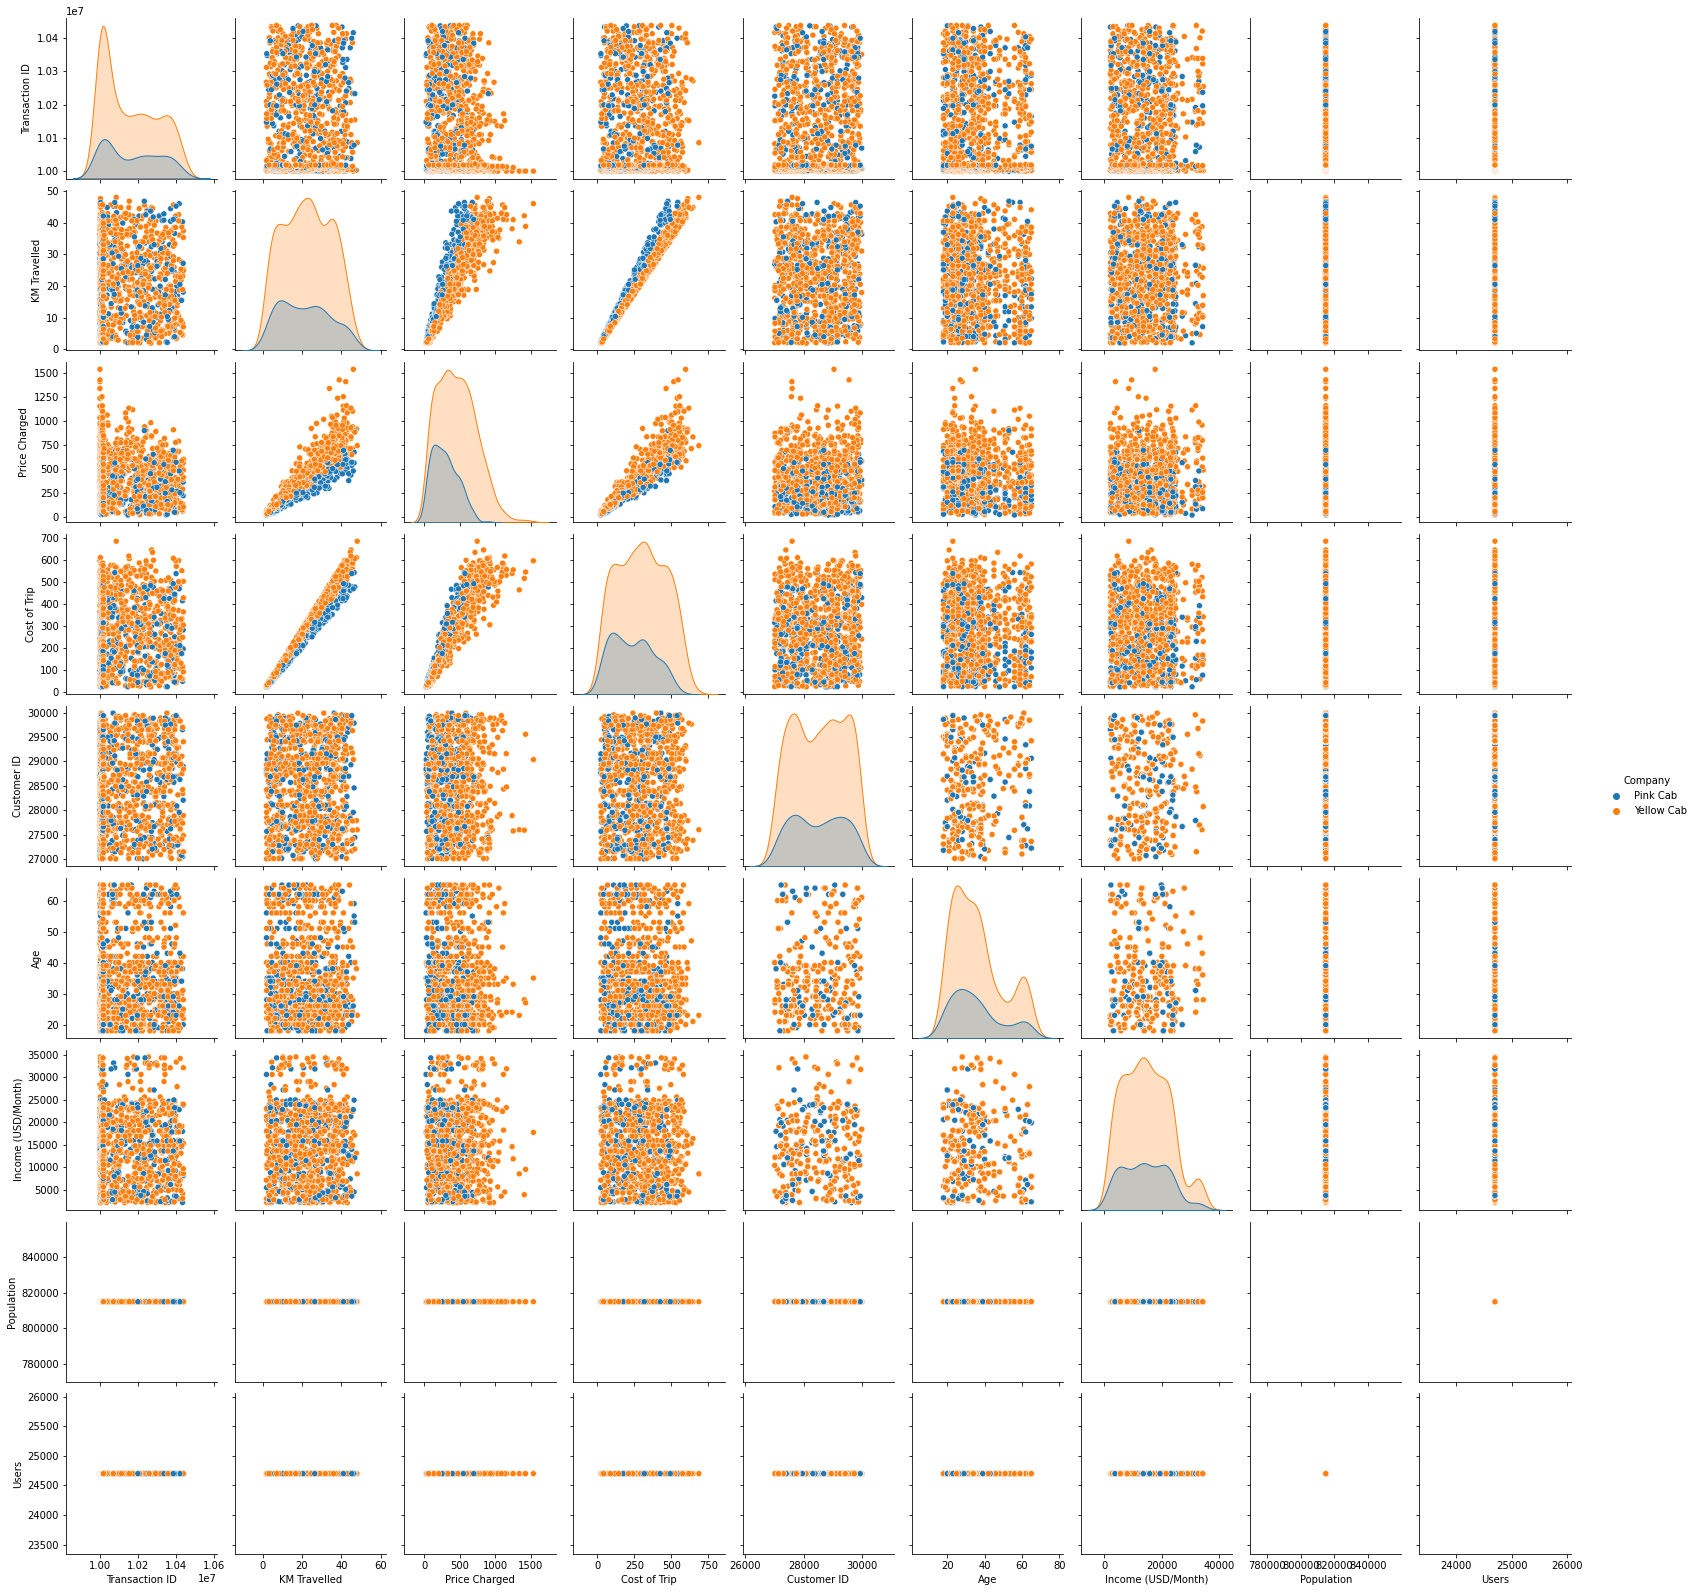

In [35]:
sns.pairplot(df.head(1000), hue = 'Company')

### Check the Correlation

In [36]:
data_corr = df.corr()
data_corr

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month),Population,Users
Transaction ID,1.000000,-0.001429,-0.052902,-0.003462,-0.016912,-0.001267,-0.001570,0.023868,0.013526
KM Travelled,-0.001429,1.000000,0.835753,0.981848,0.000389,-0.000369,-0.000544,-0.002311,-0.000428
Price Charged,-0.052902,0.835753,1.000000,0.859812,-0.177324,-0.003084,0.003228,0.326589,0.281061
Cost of Trip,-0.003462,0.981848,0.859812,1.000000,0.003077,-0.000189,-0.000633,0.015108,0.023628
Customer ID,-0.016912,0.000389,-0.177324,0.003077,1.000000,-0.004735,-0.013608,-0.647052,-0.610742
Age,-0.001267,-0.000369,-0.003084,-0.000189,-0.004735,1.000000,0.003907,-0.009002,-0.005906
Income (USD/Month),-0.001570,-0.000544,0.003228,-0.000633,-0.013608,0.003907,1.000000,0.011868,0.010464
Population,0.023868,-0.002311,0.326589,0.015108,-0.647052,-0.009002,0.011868,1.000000,0.915490
Users,0.013526,-0.000428,0.281061,0.023628,-0.610742,-0.005906,0.010464,0.915490,1.000000


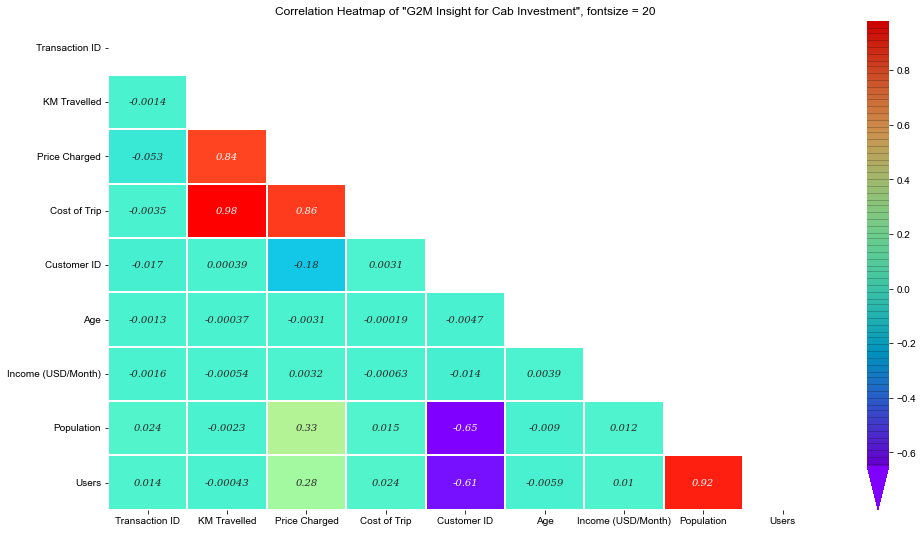

In [37]:
# Define the figure size
plt.figure(figsize = (16, 9))

# Cutomize the annot
annot_kws={'fontsize':10,                      # To change the size of the font
           'fontstyle':'italic',               # To change the style of font 
           'fontfamily': 'serif',              # To change the family of font 
           'alpha':1 }                         # To change the transparency of the text  


# Customize the cbar
cbar_kws = {"shrink":1,                        # To change the size of the color bar
            'extend':'min',                    # To change the end of the color bar like pointed
            'extendfrac':0.1,                  # To adjust the extension of the color bar
            "drawedges":True,                  # To draw lines (edges) on the color bar
           }

# take upper correlation matrix
matrix = np.triu(data_corr)

# Generate heatmap correlation
ax = sns.heatmap(data_corr, mask = matrix, cmap = 'rainbow', annot = True, linewidth = 1.5 ,annot_kws= annot_kws, cbar_kws=cbar_kws)

# Set the title etc
plt.title('Correlation Heatmap of "G2M Insight for Cab Investment", fontsize = 20')

# Set the size of text
sns.set(font_scale = 1.2)

> <b> As we can see there is strong Correlation between </b>  <br> ◉ Population vs Users <br> ◉ Price Charged vs Cost of Trip vs KM Travelled

## Investigate the Data

###  User Travel 

In [38]:
user=df.groupby('Company')
avg_user = user.Users.mean()
index = avg_user.index
value = avg_user.values 

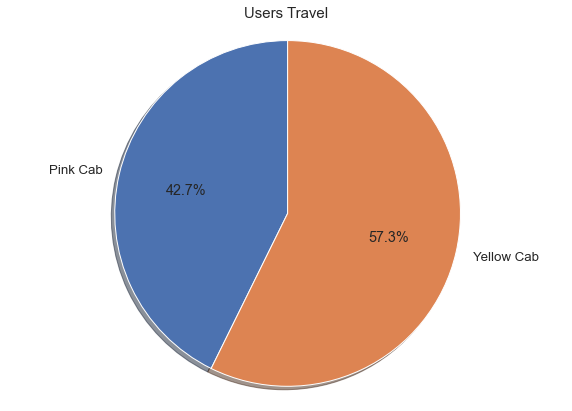

In [39]:
figp, axp = plt.subplots(figsize=(10,7))
axp.pie(value , labels=index, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')

plt.title('Users Travel', fontsize = 15)
plt.show()

> <b> As we can see users like to ride on `Yellow cab` more as compared to Pink Cab </b>

### Price Charged

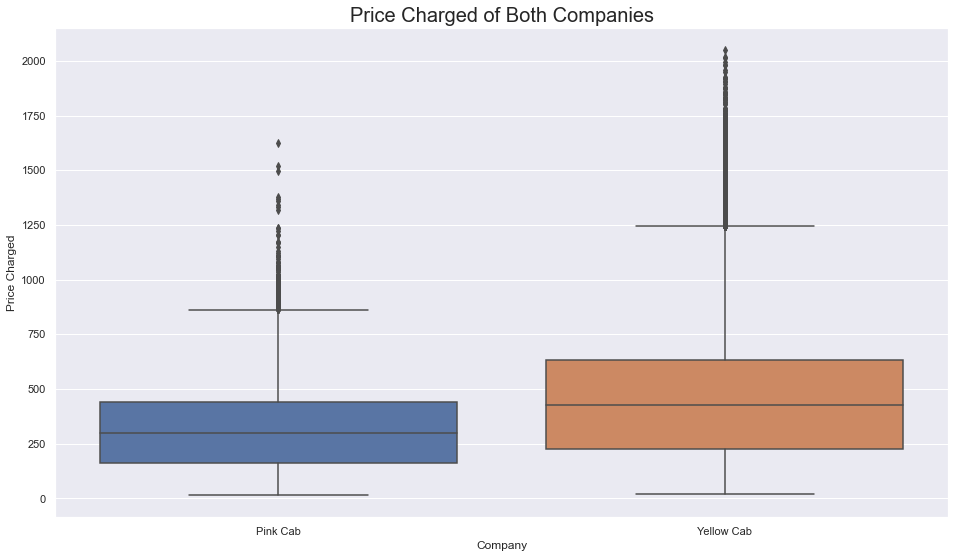

In [40]:
sns.set(style = 'darkgrid')

plt.figure(figsize = (16, 9))

sns.boxplot(df['Company'], df['Price Charged'])
plt.title('Price Charged of Both Companies', fontsize=20)
plt.show()

> <b> As we can see Price Charged of `Yellow Cab` is highest as compared to Pink Cab </b>

###  KM Travelled Distribution

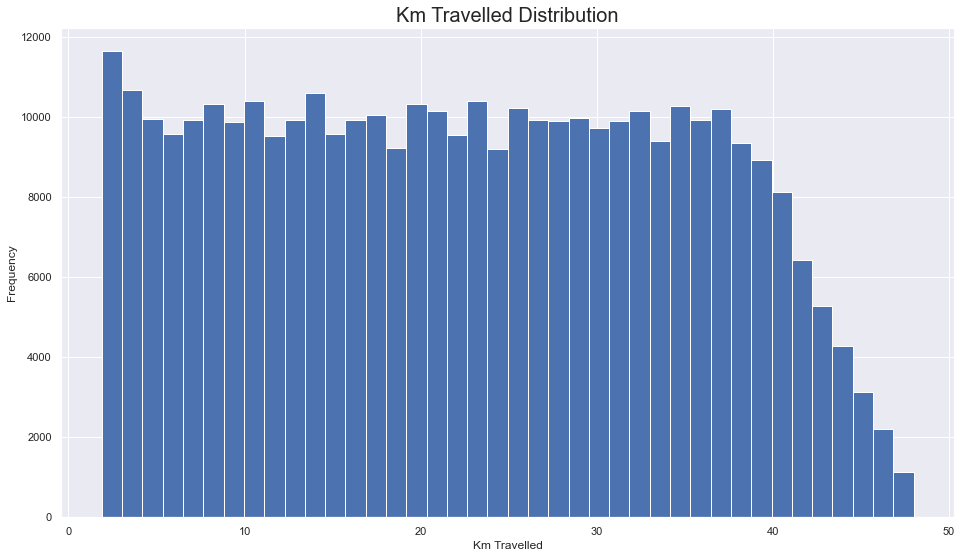

In [41]:
plt.figure(figsize = (16, 9))
plt.hist(df['KM Travelled'], bins = 40)
plt.title('Km Travelled Distribution', fontsize=20)
plt.ylabel('Frequency')
plt.xlabel('Km Travelled')
plt.show()

> <b> Most of the rides varies from `2 to 48` KM. </b>

### Payment Mode

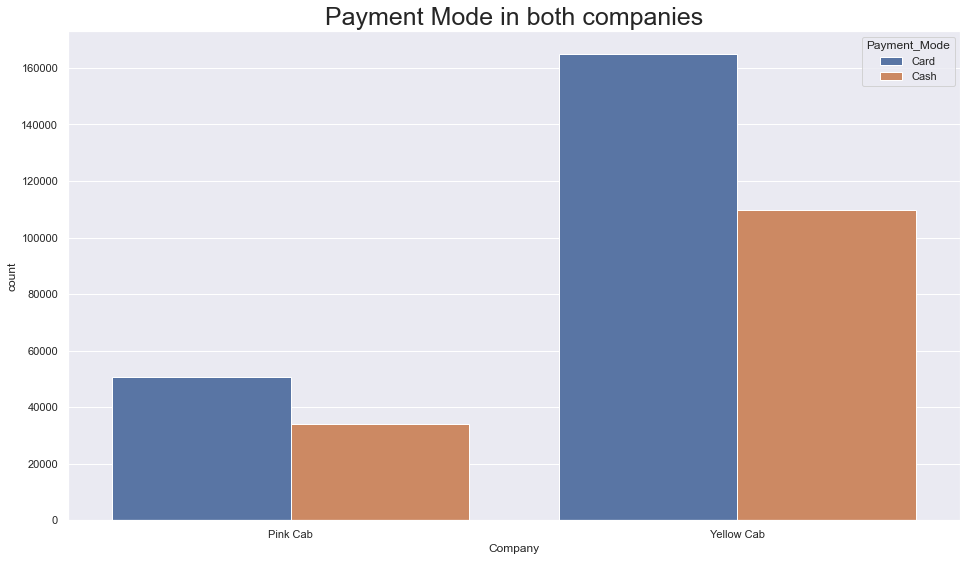

In [42]:
plt.figure(figsize = (16, 9))
ax = sns.countplot(x="Company", hue="Payment_Mode", data=df)
plt.title('Payment Mode in both companies', fontsize=25)
plt.show()

> <b> As we can see that users prefer to pay with a `card` more as compared to cash

In [43]:
gender_cab=df.groupby(['Company','Gender'])
gender_cab  = gender_cab['Customer ID'].nunique()
print(gender_cab)

Company     Gender
Pink Cab    Female    14819
            Male      17511
Yellow Cab  Female    18394
            Male      21502
Name: Customer ID, dtype: int64


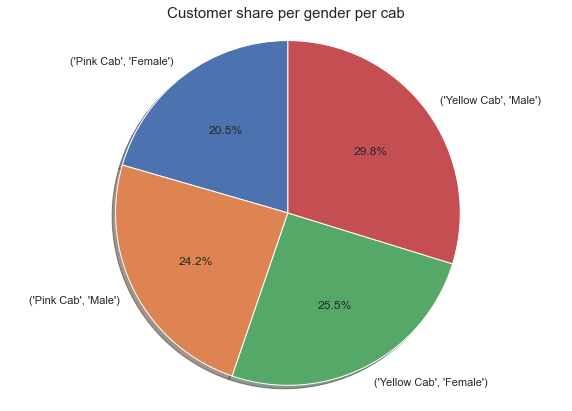

In [44]:
labs = gender_cab.index
vals = gender_cab.values
figp, axp = plt.subplots(figsize=(10,7))
axp.pie(vals , labels=labs, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')

plt.title('Customer share per gender per cab', fontsize = 15)
plt.show()

>◉ <b>`Male` users are prefer more to travel in Cab<br></b>◉ <b>Users prefer to travel in `Yellow Cab` </b>

###  Users respected Cities 

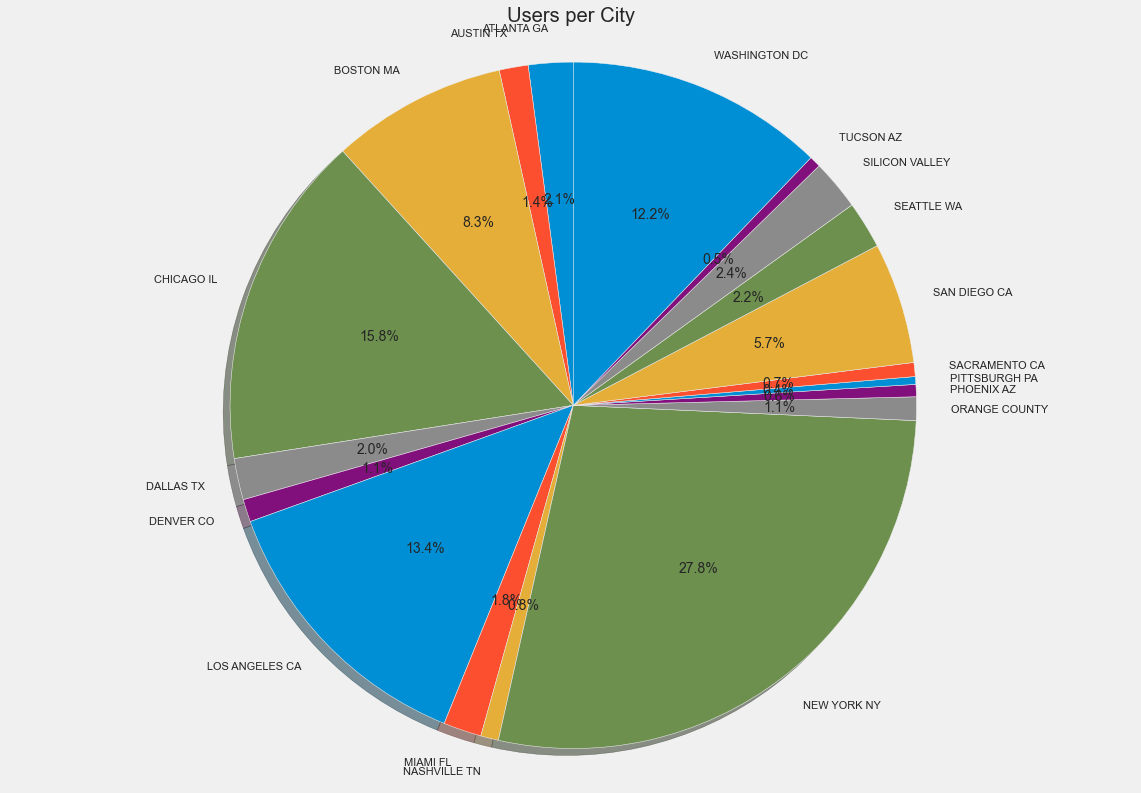

In [45]:
city_users = df.groupby('City')
city_users = city_users.Users.count()
labs = city_users.index
vals = city_users.values

plt.style.use('fivethirtyeight')
figp, axp = plt.subplots(figsize=(18,13))
axp.pie(vals , labels=labs, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')
plt.title('Users per City')
plt.show()

> <b> `New York City` has the highest Cab users with 28% followed by `Chicago` with 16% and `Los Angeles` with 13%

### Profit Margin 

In [46]:
company = df.groupby('Company')
price_charged = company['Price Charged'].mean()
cost_trip = company['Cost of Trip'].mean()
c = cost_trip.index
c_v = cost_trip.values
c_p = price_charged.values

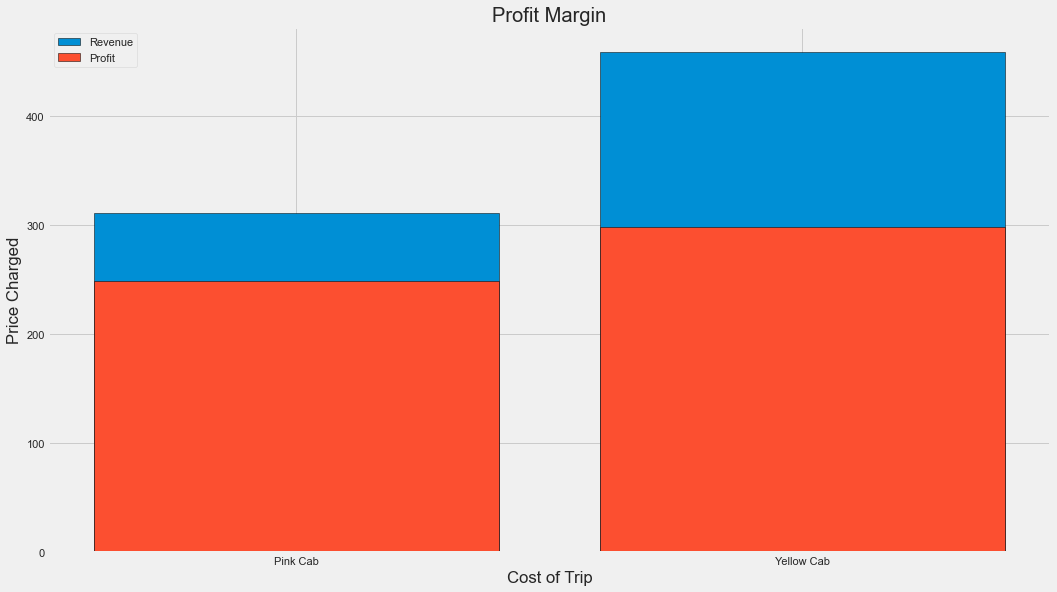

In [47]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (16, 9))
plt.bar(c, c_p, edgecolor='black', label="Revenue")
plt.bar(c, c_v, edgecolor='black', label="Profit")
plt.title('Profit Margin')
plt.ylabel('Price Charged')
plt.xlabel('Cost of Trip')
plt.legend()
plt.show()

> <b> The `Yellow cab` has a higher Profit Margin (Price Charged - Cost of Trip) compared to Pink cab

In [48]:
df['Year'] = df['Date of Travel'].dt.year
df['Month'] = df['Date of Travel'].dt.month
df['Day'] = df['Date of Travel'].dt.day
df['Profit'] = df['Price Charged'] - df['Cost of Trip']

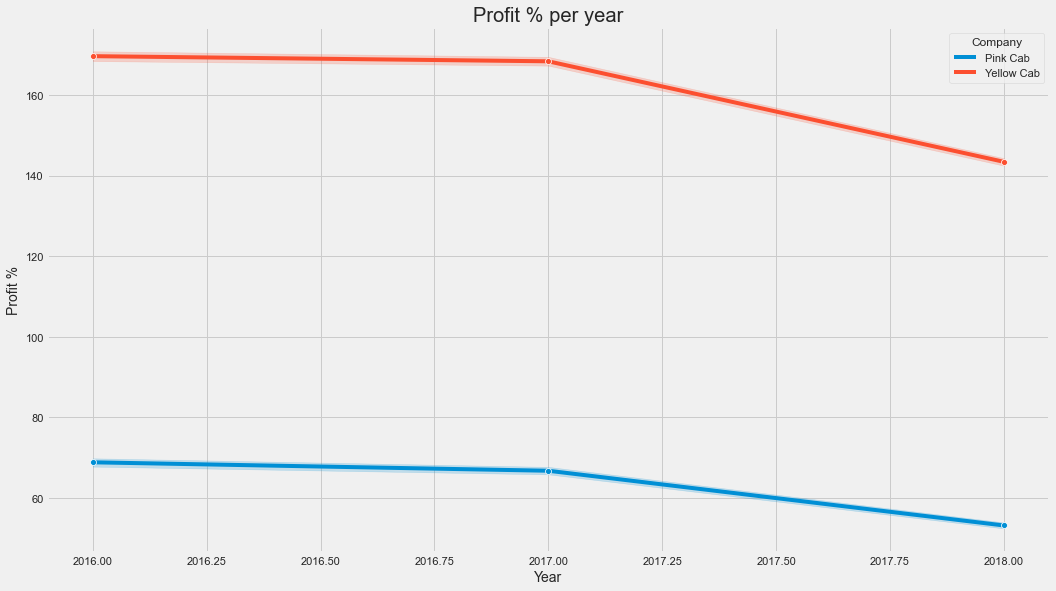

In [49]:
plt.figure(figsize = (16, 9))
sns.lineplot(x='Year', y='Profit', hue="Company", data=df, marker='o')
plt.xlabel("Year", size=14)
plt.ylabel("Profit %", size=14)
plt.title("Profit % per year")
plt.show()

> <b> The profit margin `decrease` w.r.t year

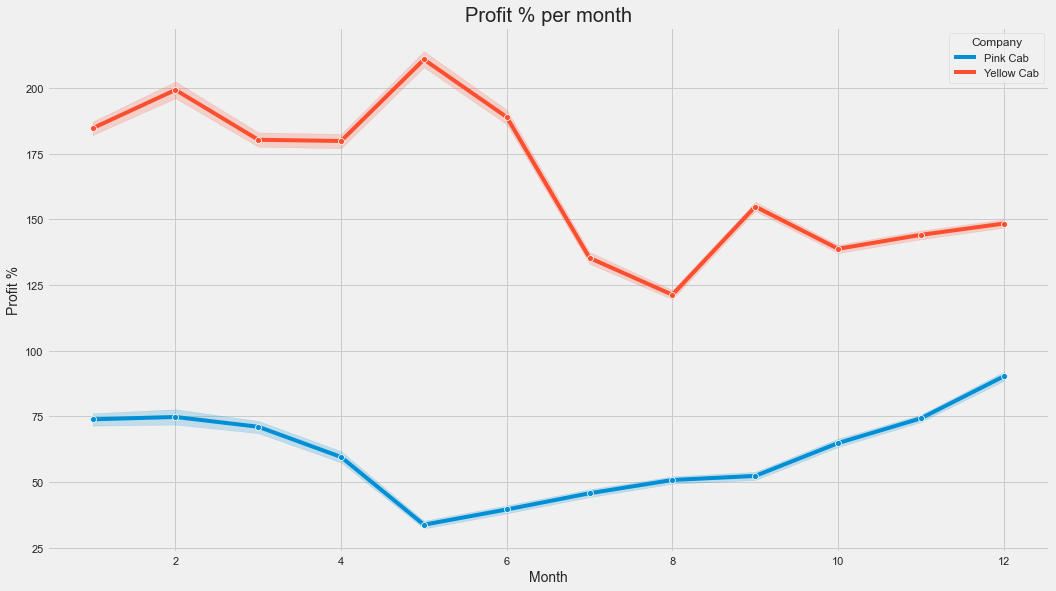

In [50]:
plt.figure(figsize = (16, 9))
sns.lineplot(x='Month', y='Profit', hue="Company", data=df, marker='o')
plt.xlabel("Month", size=14)
plt.ylabel("Profit %", size=14)
plt.title("Profit % per month")
plt.show()

> <b> The profit margin `varies` w.r.t month

###  Users Respective Population

In [51]:
urp = (city_df['Users'] /city_df['Population']) * 100 
city = city_df['City']

In [52]:
# Get the list of color
from random import randint

colors = []
n = 16

for i in range(n):
    colors.append('#%06X' % randint(0, 0xFFFFFF))

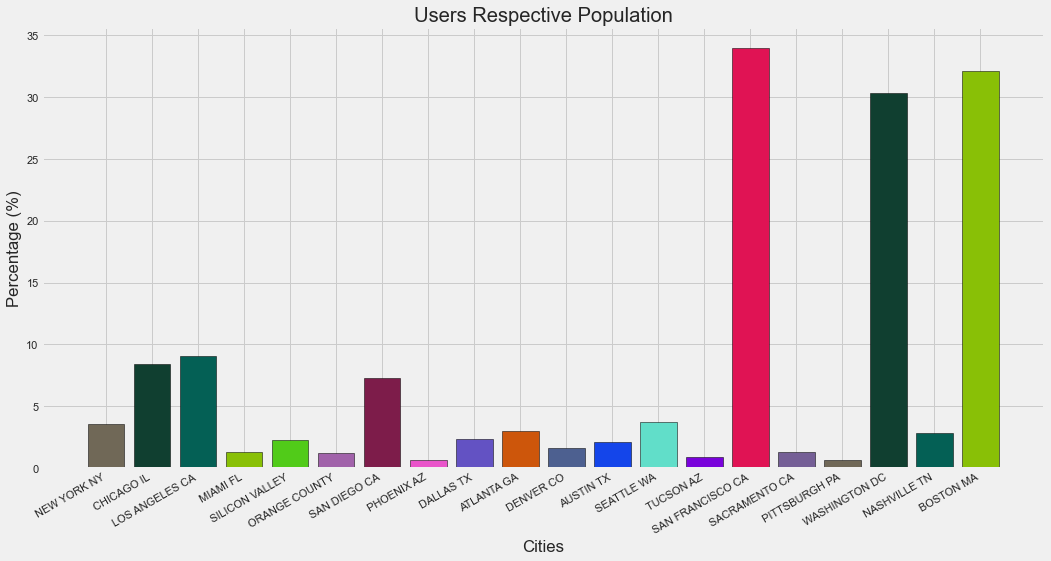

In [53]:
plt.figure(figsize = (16, 9))
plt.bar(city, urp, edgecolor='black', color = colors)
plt.gcf().autofmt_xdate()
plt.title('Users Respective Population')
plt.ylabel('Percentage (%)')
plt.xlabel('Cities')
plt.show()

> <b> As we can see  in cities `San Francisco`, `Washington` and `Boston` more than 30% of population use cab service </b>

### Average Age of Users

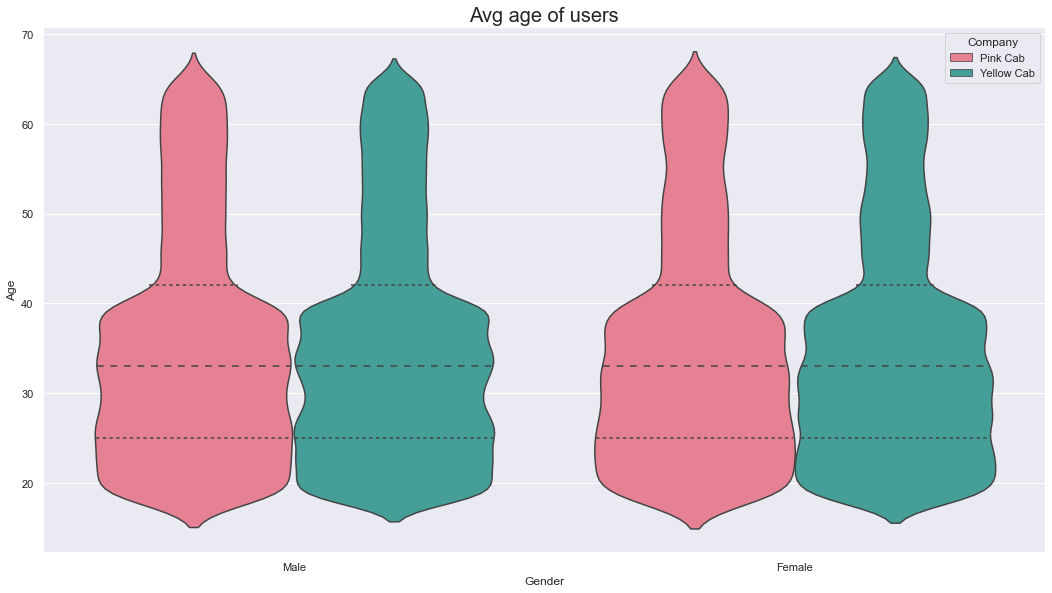

In [54]:
sns.set(style = 'darkgrid') 

plt.figure(figsize = (16, 9))

sns.violinplot(df['Gender'], df['Age'], hue = df['Company'], palette = 'husl', inner = 'quartiles')
plt.title('Avg age of users', fontsize=20)
plt.show()

> <b>As we can see `35 Avg age` of Female and Male who use Cab service </b>

###  Average Income

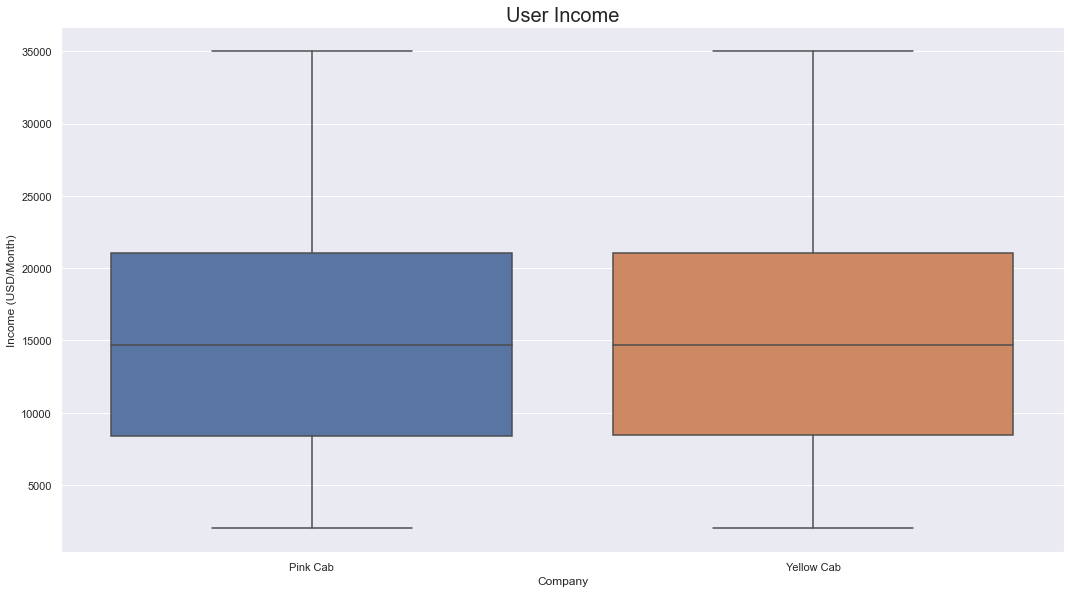

In [55]:
sns.set(style = 'darkgrid')

plt.figure(figsize = (16, 9))

sns.boxplot(df['Company'], df['Income (USD/Month)'])
plt.title('User Income', fontsize=20)
plt.show()

> <b> As we can see Avg income is around `15k$` who use cab sevice 

###  Price Charged w.r.t Distance

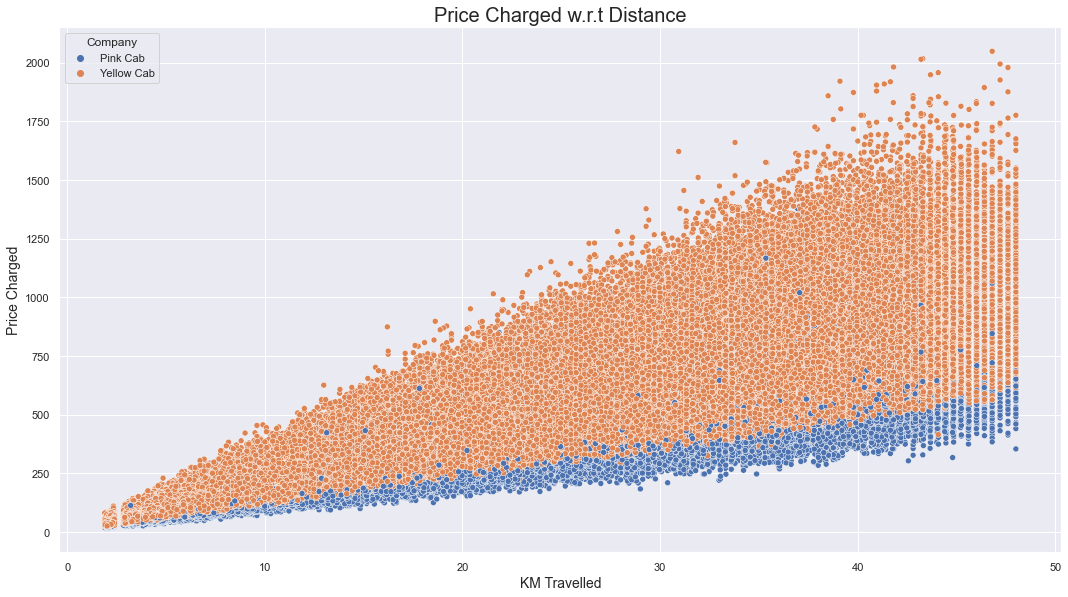

In [56]:
plt.figure(figsize = (16, 9))

sns.scatterplot(data=df, x="KM Travelled", y='Price Charged', hue='Company')
plt.title('Price Charged w.r.t Distance',fontsize = 20)
plt.ylabel('Price Charged',fontsize = 14)
plt.xlabel('KM Travelled',fontsize = 14)
plt.show()

> <b> As we can see there is a `linear relationship` between KM traveled and Price Charged as we expected. However, `Yellow Cab` has high charges compared to Pink.

##  Create Multiple Hypothesis and Investigate

###  Hypothesis 1:  Is there any difference in profit regarding Gender
There is no difference regarding Gender in both cab companies.  There is difference regarding Gender in both cab companies.

####  Pink Cab 

In [57]:
a = df[(df.Gender=='Male')&(df.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
b = df[(df.Gender=='Female')&(df.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
print(a.shape[0],b.shape[0])

_, p_value = stats.ttest_ind(a.values,
                             b.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference regarding gender for Pink Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference regarding gender for Pink Cab')

47231 37480
P value is  0.115153059004258
We accept null hypothesis (H0) that there is no difference regarding gender for Pink Cab


####  Yellow Cab 

In [58]:
a = df[(df.Gender=='Male')&(df.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
b = df[(df.Gender=='Female')&(df.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
print(a.shape[0],b.shape[0])

_, p_value = stats.ttest_ind(a.values,
                             b.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference regarding gender for Yellow Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference regarding gender for Yellow Cab')

158681 116000
P value is  6.060473042494144e-25
We accept alternative hypothesis (H1) that there is a difference regarding gender for Yellow Cab


> <b> There is no difference regarding Gender in both cab companies.</b>

###  Hypothesis 2:  Is there any difference in Profit regarding Age
> <b>H0 :</b> There is no difference regarding Age in both cab companies. <br><b>H1 :</b> There is difference regarding Age in both cab companies.

####  Pink Cab 

In [59]:
a = df[(df.Age <= 60)&(df.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
b = df[(df.Age >= 60)&(df.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
print(a.shape[0],b.shape[0])

_, p_value = stats.ttest_ind(a.values,
                             b.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference regarding age for Pink Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference regarding age for Pink Cab')

80125 5429
P value is  0.4816748536155634
We accept null hypothesis (H0) that there is no difference regarding age for Pink Cab


####  Yellow Cab 

In [60]:
a = df[(df.Age <= 60)&(df.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
b = df[(df.Age >= 60)&(df.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
print(a.shape[0],b.shape[0])

_, p_value = stats.ttest_ind(a.values,
                             b.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference regarding age for Yellow Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference regarding age for Yellow Cab')

260356 17257
P value is  6.328485471267631e-05
We accept alternative hypothesis (H1) that there is a difference regarding age for Yellow Cab


> <b>Looks like Yellow Cab company offers discounts for their customers who are older than 60 years old.</b>

### Hypothesis 3: Is there any difference in Profit regarding Payment mode
> <b>H0 :</b> There is no difference regarding Payment_Mode in both cab companies. <br><b>H1 :</b> There is difference regarding Payment_Mode in both cab companies..

####  Pink Cab 

In [61]:
a = df[(df['Payment_Mode']=='Cash')&(df.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
b = df[(df['Payment_Mode']=='Card')&(df.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()

_, p_value = stats.ttest_ind(a.values,
                             b.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference in payment mode for Pink Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference in payment mode for Pink Cab')

P value is  0.7900465828793288
We accept null hypothesis (H0) that there is no difference in payment mode for Pink Cab


####  yellow Cab 

In [62]:
a = df[(df['Payment_Mode']=='Cash')&(df.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
b = df[(df['Payment_Mode']=='Card')&(df.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()

_, p_value = stats.ttest_ind(a.values,
                             b.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference in payment mode for Yellow Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference in payment mode for Yellow Cab')

P value is  0.29330606382987284
We accept null hypothesis (H0) that there is no difference in payment mode for Yellow Cab


> <b>There is no difference in payment mode for both cab companies. </b>